In [36]:
import pandas as pd

In [48]:
import seaborn as sns

In [37]:
titanic = pd.read_csv("train.csv")

In [38]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [39]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [40]:
titanic['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [41]:
titanic['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [97]:
titanic.groupby('Sex')[['Survived', 'Pclass', 'Age', 'Fare']].aggregate('mean')

,Survived,Pclass,Age,Fare
Sex,,,,
female,0.742038,2.159236,27.915709,44.479818
male,0.188908,2.389948,30.726645,25.523893


In [98]:
titanic.groupby('Embarked')[['Survived', 'Pclass', 'Age', 'Fare']].aggregate('mean')

,Survived,Pclass,Age,Fare
Embarked,,,,
C,0.553571,1.886905,30.814769,59.954144
Q,0.389610,2.909091,28.089286,13.276030
S,0.336957,2.350932,29.445397,27.079812


In [100]:
titanic.groupby('Pclass')[['Survived', 'Age', 'Fare']].aggregate('mean')

,Survived,Age,Fare
Pclass,,,
1,0.629630,38.233441,84.154687
2,0.472826,29.877630,20.662183
3,0.242363,25.140620,13.675550


In [101]:
titanic.groupby('Survived')[['Pclass', 'Age', 'Fare']].aggregate('mean')

,Pclass,Age,Fare
Survived,,,
0,2.531876,30.626179,22.117887
1,1.950292,28.343690,48.395408


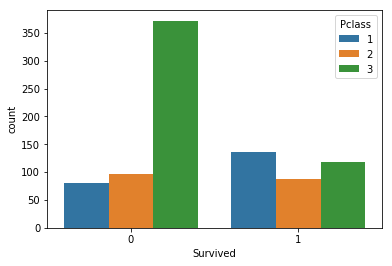

In [88]:
sns.countplot(x='Survived', hue='Pclass', data=titanic)

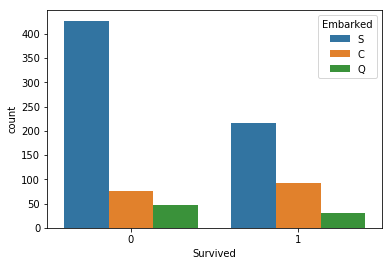

In [89]:
sns.countplot(x='Survived', hue='Embarked', data=titanic)

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


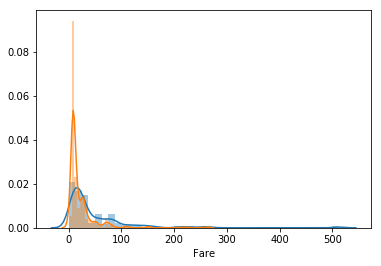

In [72]:
sns.distplot(titanic[titanic['Survived'] == 1]['Fare'])
sns.distplot(titanic[titanic['Survived'] == 0]['Fare'])

In [59]:
titanic[titanic['Fare'] > 100]['Survived'].mean()

0.7358490566037735

In [56]:
titanic[titanic['Fare'] < 100]['Survived'].mean()

0.3615751789976134

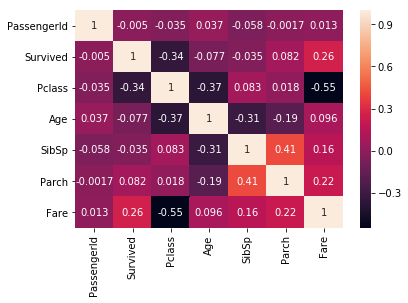

In [62]:
titanic_corr = titanic.corr()
sns.heatmap(titanic_corr, annot=True)

Conclusion: 
- more men on board than women but less men survived than women --> a lot of men sacrificed their chances of being rescued for women
- on average, people who paid more and were younger got higher chances of surviving
- on average, people from embarking location C got higher chances of surviving than the rest
- on average, people with/without siblings/spouses or parents/children got roughly equal chances of surviving
- class from 3 to 1: survival rate increases, age increases